# Transform user into vector space

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# Data 

We'll build a small program to generate a sample dataset of user that has schema below:
```
Wallet Address | Transaction Count | Transaction Volume | Avg Transaction Value | Transaction Frequency | Asset Diversity | Liquidity Provision | Staking Activity | Yield Farming Participation | Borrowing Value | Borrowing Frequency | Lending Value | Lending Frequency | Active Periods| Transaction Recency | Historical Activity Trends
```



In [6]:
import random
import string

def random_wallet_address():
    return "0x" + ''.join(random.choices(string.ascii_letters + string.digits, k=40))

def random_time_frame():
    return random.choice(['Daily', 'Weekly', 'Bi-weekly', 'Monthly', 'Never'])

def random_activity_trend():
    return random.choice(['Increasing', 'Stable', 'Decreasing'])

def random_active_periods():
    periods = [
        'Weekdays 10am-4pm', 'Weekdays 6pm-10pm', 'Weekdays 9am-5pm', 
        'Weekdays 7am-9am', 'Weekends 1pm-5pm', 'Weekends 8pm-12am',
        'Weekends 6pm-10pm', 'Weekdays 11am-3pm', 'Weekends 10am-2pm'
    ]
    return random.choice(periods)

# Generate 100 records
data = []
for _ in range(100):
    record = {
        "Wallet Address": random_wallet_address(),
        "Transaction Count": random.randint(10, 200),
        "Transaction Volume": random.randint(1000, 50000),
        "Avg Transaction Value": random.randint(200, 300),
        "Transaction Frequency": random_time_frame(),
        "Asset Diversity": random.randint(1, 10),
        "Liquidity Provision": random.randint(1000, 20000),
        "Staking Activity": random.randint(500, 10000),
        "Yield Farming Participation": random.randint(0, 15000),
        "Borrowing Value": random.randint(0, 5000),
        "Borrowing Frequency": random_time_frame(),
        "Lending Value": random.randint(0, 7000),
        "Lending Frequency": random_time_frame(),
        "Active Periods": random_active_periods(),
        "Transaction Recency": random.choice(["1 day ago", "2 days ago", "3 days ago", "1 week ago", "2 weeks ago", "1 month ago"]),
        "Historical Activity Trends": random_activity_trend()
    }
    data.append(record)

df = pd.DataFrame(data=data)
df.head(10)


Wallet Address  Transaction Count  \
0  0x4w5qFhl7wgFLwVE0ZlaHk6sjNWd6xliLmn8vLq97                154   
1  0x2M6KO5TvGez2LCn4weFdI4RXBRJ3kTVEBWtIK0n0                 23   
2  0xbpXxykLr15t73HAexiUlOHzfiwNuxfnCYiiUyFdd                 31   
3  0x2XGUehw6PlEYe69NZk1Qtf8yMjoylhz1heo1oDJi                141   
4  0xs0QX4UfexwYd0quzW7P9Hw3uHTTTwG2jx9lkdoRg                112   
5  0xwtXhxzRgb8G1tD065JQkTgqi1HmwYmEnaZYVdzyq                138   
6  0xqSKdKE0FdOeLTiHI08WfGsYLJfRz4OMDZIbFMLmV                 54   
7  0xVDk4jvAWlDpaEkhMhrxZKr0p7uqpHsz7mee96Lv6                164   
8  0xgTlUywOCKmtntLGJOQnbTn8YcJFDZPCvNIZtMqID                162   
9  0xUhg8trjjhVhBRrIblUT0HTX4dRdn2XmlTY3aAzX4                 63   

   Transaction Volume  Avg Transaction Value Transaction Frequency  \
0               18248                    274                 Never   
1               16162                    298             Bi-weekly   
2               42378                    252             Bi-weekly   
3               13233                    300                 Never   
4                2435                    296               Monthly   
5               42199                    218             Bi-weekly   
6               10064                    218               Monthly   
7               23546                    246                Weekly   
8               43583                    260                Weekly   
9                5062                    264                Weekly   

   Asset Diversity  Liquidity Provision  Staking Activity  \
0                5                 5926              7232   
1                3                 1110              6273   
2                5                12326              9085   
3                1                19476              8981   
4                7                12749              5968   
5                7                11407              7306   
6                5                16907              4248   
7                7                 3104              1992   
8                8                11279              7559   
9                4                18988              4557   

   Yield Farming Participation  Borrowing Value Borrowing Frequency  \
0                        11620              937           Bi-weekly   
1                         1872             1405           Bi-weekly   
2                         3379             1913             Monthly   
3                         2560             2388             Monthly   
4                         2967             4038              Weekly   
5                         9080             4033           Bi-weekly   
6                        12041             4489               Never   
7                         7173             2060             Monthly   
8                         3514             1115           Bi-weekly   
9                         6130              488              Weekly   

   Lending Value Lending Frequency     Active Periods Transaction Recency  \
0           1065             Never  Weekdays 11am-3pm         2 weeks ago   
1            312         Bi-weekly  Weekends 8pm-12am          1 week ago   
2           4942             Never  Weekdays 10am-4pm           1 day ago   
3            200            Weekly  Weekends 6pm-10pm         1 month ago   
4           6802             Never  Weekends 10am-2pm           1 day ago   
5           1695            Weekly   Weekdays 7am-9am          1 week ago   
6           2352         Bi-weekly  Weekends 8pm-12am         1 month ago   
7            930             Never   Weekdays 9am-5pm          2 days ago   
8           2307           Monthly  Weekdays 10am-4pm         2 weeks ago   
9           1183           Monthly  Weekends 8pm-12am           1 day ago   

  Historical Activity Trends  
0                 Decreasing  
1                     Stable  
2                 Decreasing  
3                 Decreasing  
4                 Increasing  
5                 Incre

# Transform user to vector 

$$u_i = f(x_i)$$

$f$:is a transform function.

$x_i$: is a features set of user.

$u_i$: is a vector of specific user.

In [7]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder


def transform_function(df):

    ordinal_features = ["Transaction Frequency", "Historical Activity Trends", "Transaction Recency"]
    ordinal_encoder = OrdinalEncoder(categories=[["Never", "Monthly", "Bi-weekly", "Weekly", "Daily"], ["Decreasing", "Stable", "Increasing"], ["1 day ago", "2 days ago", "3 days ago", "1 week ago", "2 weeks ago", "1 month ago"]])
    df[ordinal_features] = ordinal_encoder.fit_transform(df[ordinal_features])

    onehot_features = ["Active Periods"]
    onehot_encoder = OneHotEncoder()
    onehot_encoded = onehot_encoder.fit_transform(df[onehot_features]).toarray()
    onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(onehot_features))

    df = pd.concat([df.drop(columns=["Wallet Address", "Active Periods"]), onehot_encoded_df], axis=1)
    return df 

df = transform_function(df)


In [8]:
pd.options.display.max_colwidth = None
pd.options.display.max_columns = None

df = df.drop(columns=['Lending Frequency', 'Borrowing Frequency'])
df.head()

Transaction Count  Transaction Volume  Avg Transaction Value  \
0                154               18248                    274   
1                 23               16162                    298   
2                 31               42378                    252   
3                141               13233                    300   
4                112                2435                    296   

   Transaction Frequency  Asset Diversity  Liquidity Provision  \
0                    0.0                5                 5926   
1                    2.0                3                 1110   
2                    2.0                5                12326   
3                    0.0                1                19476   
4                    1.0                7                12749   

   Staking Activity  Yield Farming Participation  Borrowing Value  \
0              7232                        11620              937   
1              6273                         1872             1405   
2              9085                         3379             1913   
3              8981                         2560             2388   
4              5968                         2967             4038   

   Lending Value  Transaction Recency  Historical Activity Trends  \
0           1065                  4.0                         0.0   
1            312                  3.0                         1.0   
2           4942                  0.0                         0.0   
3            200                  5.0                         0.0   
4           6802                  0.0                         2.0   

   Active Periods_Weekdays 10am-4pm  Active Periods_Weekdays 11am-3pm  \
0                               0.0                               1.0   
1                               0.0                               0.0   
2                               1.0                               0.0   
3                               0.0                               0.0   
4                               0.0                               0.0   

   Active Periods_Weekdays 6pm-10pm  Active Periods_Weekdays 7am-9am  \
0                               0.0                              0.0   
1                               0.0                              0.0   
2                               0.0                              0.0   
3                               0.0                              0.0   
4                               0.0                              0.0   

   Active Periods_Weekdays 9am-5pm  Active Periods_Weekends 10am-2pm  \
0                              0.0                               0.0   
1                              0.0                               0.0   
2                              0.0                               0.0   
3                              0.0                               0.0   
4                              0.0                               1.0   

   Active Periods_Weekends 1pm-5pm  Active Periods_Weekends 6pm-10pm  \
0                              0.0                               0.0   
1                              0.0                               0.0   
2                              0.0                               0.0   
3                              0.0                               1.0   
4                              0.0                               0.0   

   Active Periods_Weekends 8pm-12am  
0                               0.0  
1                               1.0  
2                               0.0  
3                               0.0  
4                               0.0

# Similarity 

Assume we have a set of users that represented by matrix $P$ where each user is presented by vector $p$. Now, we want to list all of 
top (eg: 10) user that they are the most similar with user $p_i$.

From matrix $P$, we compute covariance matrix $Q$, that is formed:
$$
\begin{aligned}
Q = P \cdot P^T \\
\end{aligned}
$$

The, the similar score of $p_i$ will be $q_i$, to get the top similarity of $p_i$:
    $$top_i = argmax(q_i)$$

(we also ignore product $i$ in the top_i as itself similar score is 1)

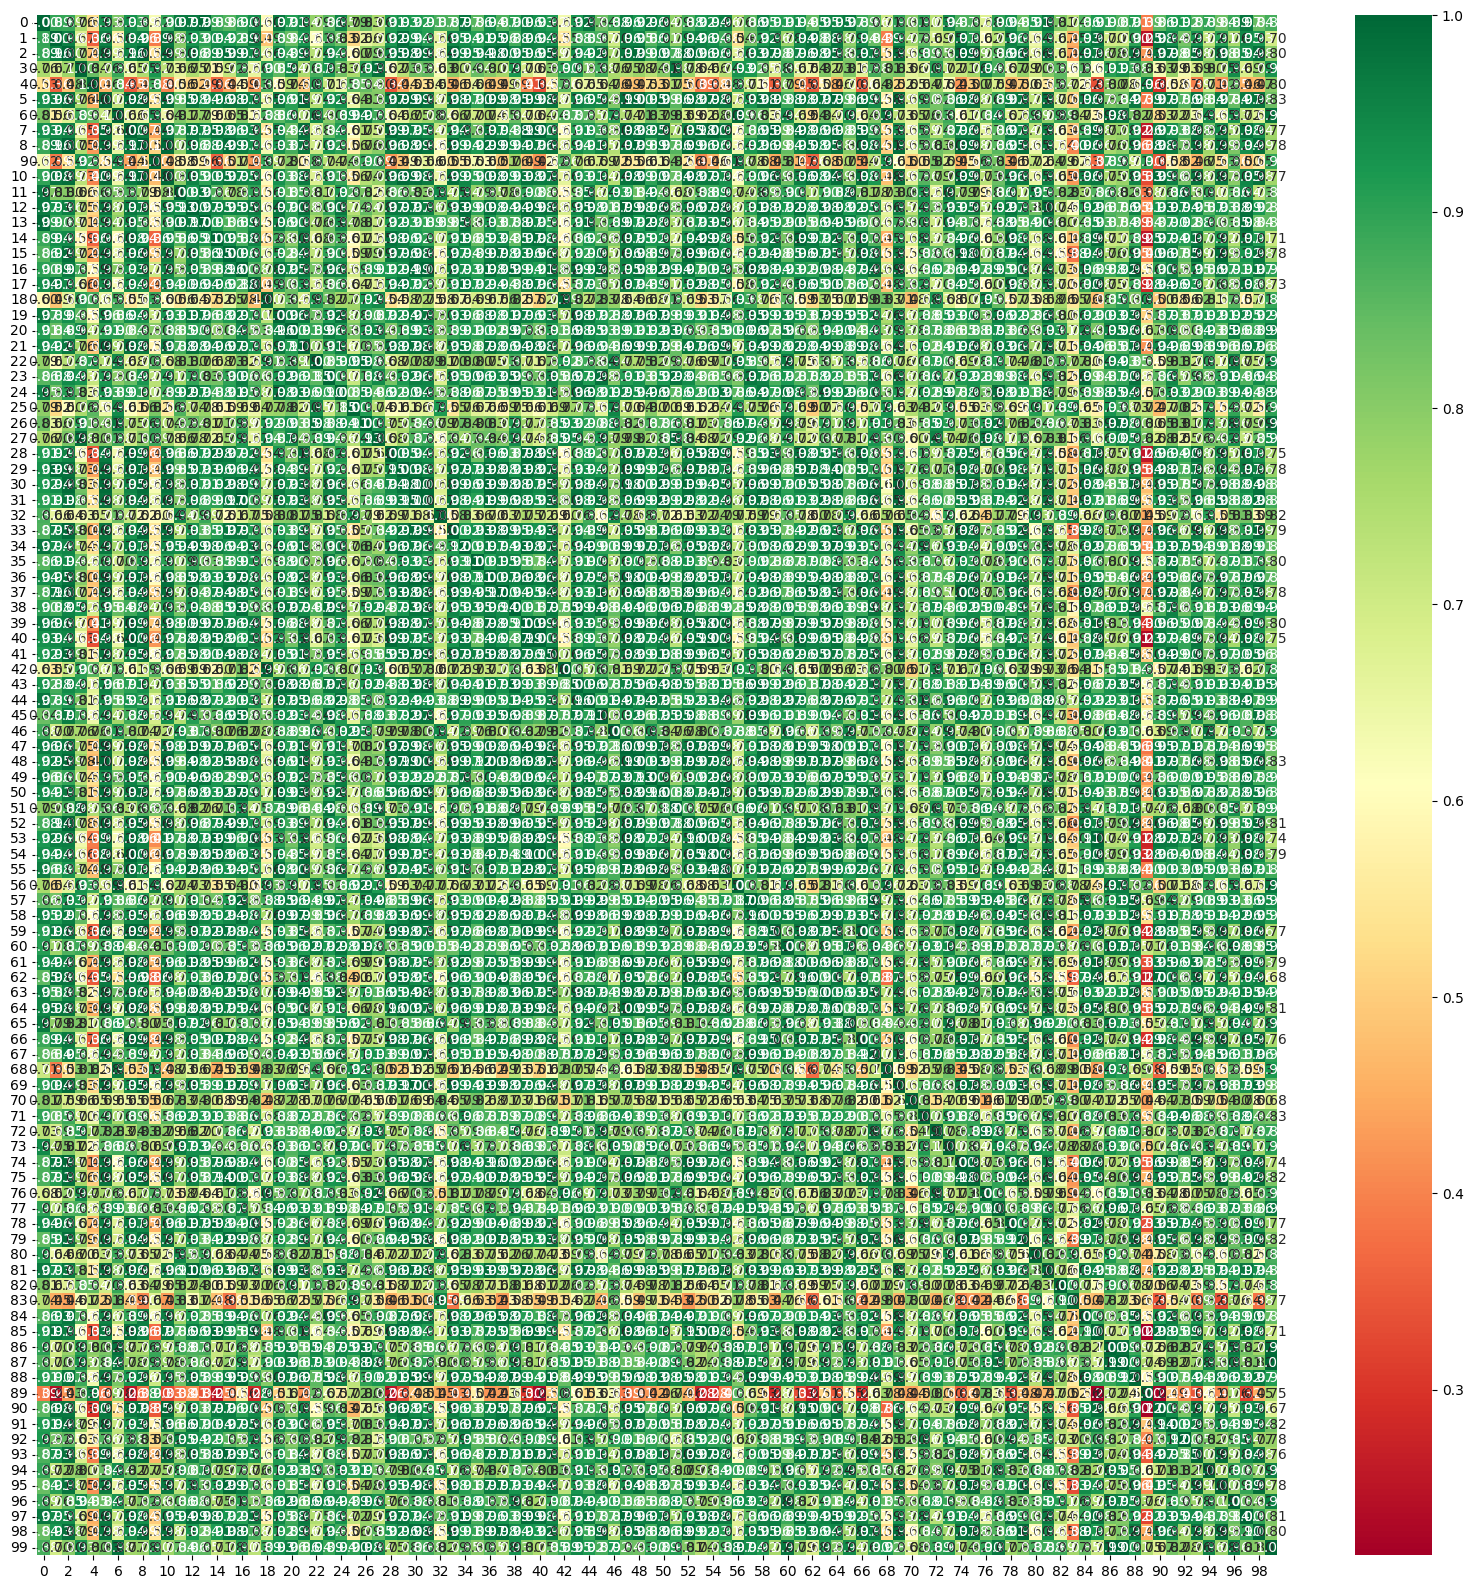

In [9]:
user_matrix = df.astype(float).to_numpy()

norm_products = user_matrix/np.linalg.norm(user_matrix, axis=1)[:, None]
Q = np.dot(norm_products, norm_products.T)

fig, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(Q, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

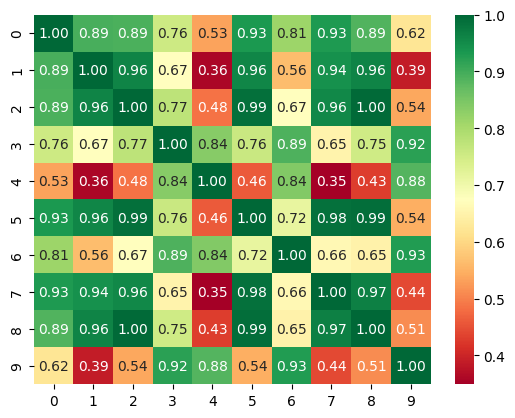

In [10]:
sns.heatmap(Q[:10, :10], annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

# Classification users

Implement simple classification on this data shows the highest participation in staking...

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Assuming the data has already been prepared and encoded as in the previous steps

# Define high participation in staking as above the median
threshold = df['Staking Activity'].quantile(0.8)
df['High Staking Participation'] = (df['Staking Activity'] > threshold).astype(int)

# Features and target
X = df.drop(columns=['Staking Activity', 'High Staking Participation'])
y = df['High Staking Participation']

# Handle imbalanced data
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=1, verbose=2)
grid_search.fit(X_train, y_train)

best_clf = grid_search.best_estimator_

# Predictions
y_pred = best_clf.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END m